### what are Embeddings?

Think of embeddings as a way to translate words into a language that computers understand- numbers!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# simplified 2D example
word_embeddings = {
    "cat":[0.8,0.6],
    "dog":[0.75,0.3],
    "car":[-0.5,0.2],
    "bus":[-0.45,0.2],
    "kitten":[0.75,0.65],
    "puppy":[0.65,0.35]
}



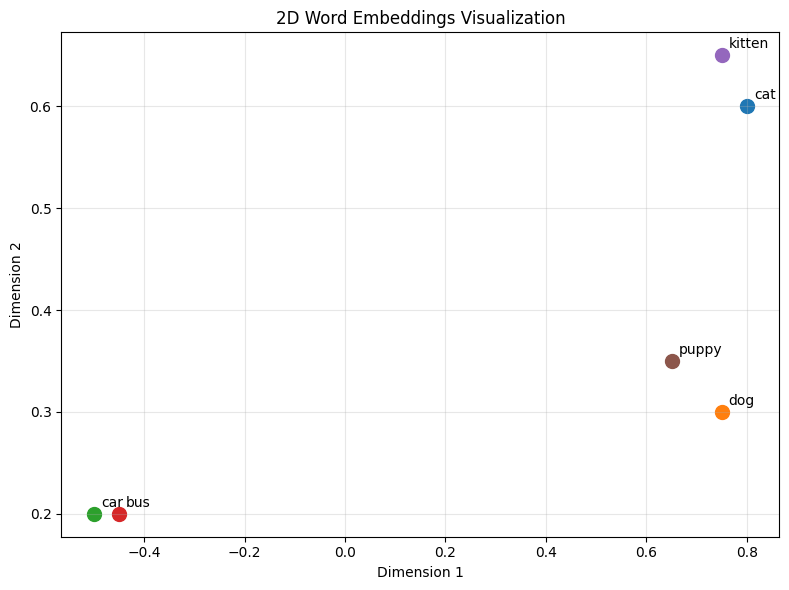

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), textcoords="offset points", xytext=(5,5))

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("2D Word Embeddings Visualization")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
### Measuring similarity
def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors.
         - Result close to 1 means high similarity.
         - Result close to 0 means low similarity.
         - Result close to -1 means opposite meanings.
    """

    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [ ]:
#example
cat_vector =[0.8,0.6,0.3]
kitten_vector =[0.75,0.65,0.4]
car_vector =[ -0.5,0.2,0.1]

similarity_cat_kitten = cosine_similarity(cat_vector, kitten_vector)
print(f"Cosine Similarity between 'cat' and 'kitten': {similarity_cat_kitten:.4f}")

similarity_cat_car = cosine_similarity(cat_vector, car_vector)
print(f"Cosine Similarity between 'cat' and 'car': {similarity_cat_car:.4f}")


Cosine Similarity between 'cat' and 'kitten': 0.9936
Cosine Similarity between 'cat' and 'car': -0.4372


### create First Embeddings

In [2]:
##Huggingface Embeddings Example

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize the HuggingFace Embeddings model(no API key is required)

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
embedding_model

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [36]:
# create your first embeddings

text="The quick brown fox jumps over the lazy dog."
embedding_vector = embedding_model.embed_query(text)
print(f"Length of embedding vector: {len(embedding_vector)}")
print(f"Embedding vector for the text: {embedding_vector[:5]}...")  #

Length of embedding vector: 384
Embedding vector for the text: [0.04393352195620537, 0.05893441289663315, 0.04817836359143257, 0.0775480642914772, 0.0267444159835577]...


In [37]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "A fast dark-colored fox leaps above a sleepy canine.",
    "The sun is shining brightly today.",
    "I love to play football on weekends.",
    "I love to play football on weekends."
]

embedding_sentences = embedding_model.embed_documents(sentences)
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}")
    print(f"Embedding Vector (first 5 values): {embedding_sentences[i][:5]}...\n")

for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        sim = cosine_similarity(embedding_sentences[i], embedding_sentences[j])
        print(f"'{sentences[i]}' vs '{sentences[j]}' => Cosine Similarity: {sim:.4f}")
        print(f"Cosine Similarity between Sentence {i+1} and Sentence {j+1}: {sim:.4f}")

Sentence: The quick brown fox jumps over the lazy dog.
Embedding Vector (first 5 values): [0.04393356665968895, 0.05893436819314957, 0.04817838966846466, 0.0775480642914772, 0.026744306087493896]...

Sentence: A fast dark-colored fox leaps above a sleepy canine.
Embedding Vector (first 5 values): [0.03092162497341633, -0.0062569510191679, 0.056381724774837494, 0.10855650901794434, 0.024840328842401505]...

Sentence: The sun is shining brightly today.
Embedding Vector (first 5 values): [0.03292299434542656, 0.13401424884796143, 0.10439993441104889, 0.07166297733783722, 0.037070173770189285]...

Sentence: I love to play football on weekends.
Embedding Vector (first 5 values): [0.0014847717247903347, -0.03806108236312866, 0.045504067093133926, -0.014018277637660503, 0.08045728504657745]...

Sentence: I love to play football on weekends.
Embedding Vector (first 5 values): [0.0014847717247903347, -0.03806108236312866, 0.045504067093133926, -0.014018277637660503, 0.08045728504657745]...

'Th

In [41]:
# Example- Semantic Search with Embeddings
documents=[
    "langchain is a framework for developing applications powered by language models.",
    "Embeddings are numerical representations of text that capture semantic meaning.",
    "Machine learning is the subset of artificial intelligence",
    "Python is a popular programming language for data science.",
    "The capital of France is Paris."
]

query="What is langchain?"

In [42]:
def semantic_search(query, documents, embedding_model, top_k=3):
    query_embedding = embedding_model.embed_query(query)
    document_embeddings = embedding_model.embed_documents(documents)

    similarities = []
    for i, doc_embedding in enumerate(document_embeddings):
        sim = cosine_similarity(query_embedding, doc_embedding)
        similarities.append((documents[i], sim))

    similarities.sort(reverse=True)
    return similarities[:top_k]

In [45]:
results = semantic_search(query, documents, embedding_model, top_k=4)
print("Semantic Search Results:")
for doc, sim in results:
    print(f"Document: {doc}, Similarity: {sim:.4f}")

Semantic Search Results:
Document: langchain is a framework for developing applications powered by language models., Similarity: 0.7087
Document: The capital of France is Paris., Similarity: 0.0857
Document: Python is a popular programming language for data science., Similarity: 0.1168
Document: Machine learning is the subset of artificial intelligence, Similarity: 0.0914
